#Question1- Classification


---
> Importing Required Packages









In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import datetime
from keras.datasets import cifar10


---
> Loading Datasets






In [2]:
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


---

> Determining Labels






In [3]:
cifar10_labels = ["airplane",
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]

---
> Ploting 10 random images









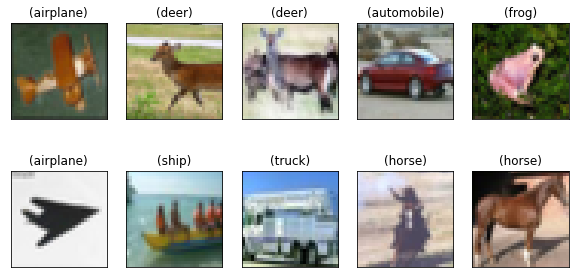

In [4]:
figure = plt.figure(figsize=(10, 5))
for i, index in enumerate(np.random.choice(X_train.shape[0], size = 10, replace = False)):
    img = figure.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    # Displaying each image
    img.imshow(np.squeeze(X_train[index]))
    true_index = (Y_train[index])[0]
    # Setting the title for each image
    img.set_title("({})".format(cifar10_labels[true_index]))


---
> Data Preproccesing


In [5]:
# Data_Normalization
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255

# Converting RGB to Grayscale
x_train = np.mean(x_train, axis=3)
x_test= np.mean(x_test, axis=3)

# Changing Size
x_train = x_train.reshape(-1,32*32)
x_test = x_test.reshape(-1,32*32)

---

> Plotting a grayscale image



Text(0.5, 1.0, '(grayscale)')

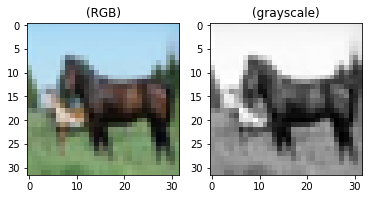

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[12])
plt.title('(RGB)')
plt.subplot(1, 2, 2)
plt.imshow(x_train[12].reshape(32,32), cmap = 'gray')
plt.title('(grayscale)')

---
> Defining Validation Data




In [7]:
(x_train,x_valid) = x_train[10000:],x_train[:10000]
(Y_train,Y_valid) = Y_train[10000:],Y_train[:10000]

---


> One-Hot-Encoding



In [8]:
y_train = keras.utils.to_categorical(Y_train,10)
y_valid = keras.utils.to_categorical(Y_valid,10)
y_test = keras.utils.to_categorical(Y_test,10)

---


> Creating Model



In [22]:
from keras import layers
model = tf.keras.Sequential()

model.add(layers.Dense(512, activation = 'relu', input_dim = 32*32))

model.add(layers.Dense(256, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 658,698
Trainable params: 658,698
Non-trainable params: 0
_________________________________________________________________


---


> Compiling Model



In [23]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

---


> Training Model



In [24]:
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size = 128, epochs = 20, 
                         verbose=1, validation_data=(x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/20
313/313 [==============================] - 2s 6ms/step - loss: 2.0497 - accuracy: 0.2564 - val_loss: 1.9302 - val_accuracy: 0.3044
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.8926 - accuracy: 0.3233 - val_loss: 1.8650 - val_accuracy: 0.3267
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.8278 - accuracy: 0.3479 - val_loss: 1.8701 - val_accuracy: 0.3286
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7780 - accuracy: 0.3674 - val_loss: 1.7698 - val_accuracy: 0.3725
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7387 - accuracy: 0.3804 - val_loss: 1.7697 - val_accuracy: 0.3731
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.6986 - accuracy: 0.3949 - val_loss: 1.7023 - val_accuracy: 0.3991
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.6685 - accuracy: 0.4094 - val_loss: 1.7248 - val_accuracy: 0.3883
Epoch 

---
>Traning Time

In [25]:
Training_Time = end - start
print ('Training_Time:', Training_Time)

Training_Time: 0:00:32.863951


---


> Plotting Loss & Accuracy Curves



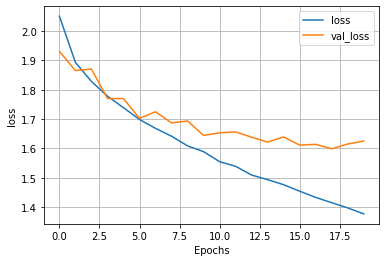

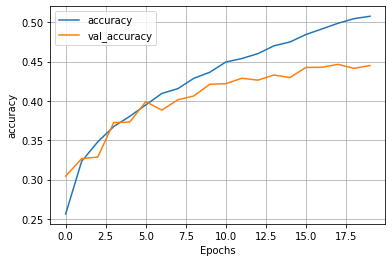

In [26]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.grid()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['accuracy','val_accuracy'])
plt.grid()

---


> Test_Loss & Test_Accuracy



In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

Test_loss: 1.6274052858352661
Test_accuracy: 0.43619999289512634


---


> Predicting 10 Random Test Data



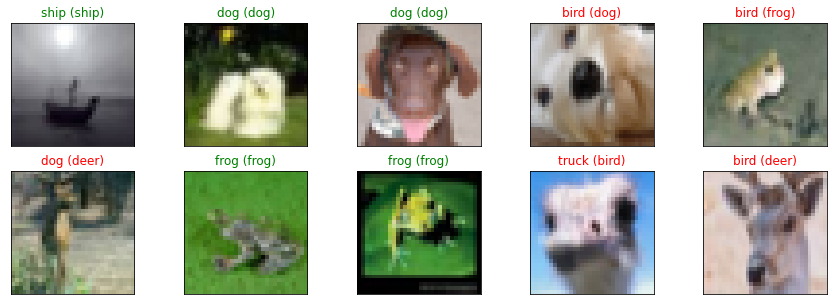

In [31]:
y_pred = model.predict(x_test)
figure = plt.figure(figsize=(15, 5))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Confusion Matrix

Text(114.0, 0.5, 'True')

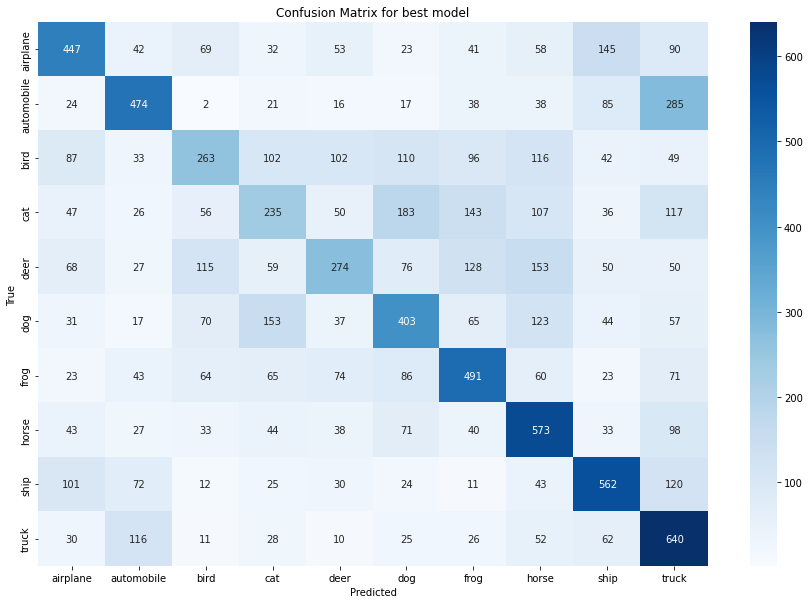

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_pred = np.argmax(model.predict(x_test),axis=1)
y_target = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_target, y_pred)
plt.figure(figsize=(15,10))
sn.heatmap(cm,cmap='Blues',annot=True,fmt="d",
           xticklabels=cifar10_labels,yticklabels=cifar10_labels)
plt.title('Confusion Matrix for best model')
plt.xlabel('Predicted')
plt.ylabel('True')



#Precision, Recall and f1-score

In [32]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
f1_score = 2 * (precision * recall) / (precision + recall)
print('Precision = %.3f'%(precision.mean())) 
print('Recall = %.3f'%(recall.mean())) 
print('F1-Score = %.3f'%(f1_score.mean())) 

Precision = 0.433
Recall = 0.436
F1-Score = 0.428
